# Assignment 1 - Decision Trees and Clustering Techniques

## *Aprendizagem Computacional - MEI | Computação Neuronal e Sistemas Difusos - MIEB*

### by Catarina Silva and Marco Simões

_

This assignment will assess the students knowledge on the following Machine Learning topics:
- Decision Trees
- Clustering Techniques

The assignment is split into two sub-assignments: 1-a) Decision Trees (first week) and 1-b) Clustering Techniques (second week).

Students should implement their solutions and answering the questions directly in the notebooks, and submit both files together in Inforestudante before the deadline: *06/10/2021*

## Conditions: 
- *Groups:* two elements of the same PL class
- *Duration:* 2 weeks
- *Workload:* 8h per student

|Student         | Number       |
| ---------------| ------------ |
|Miguel Rabuge   | 2018293728   |
|Pedro Rodrigues | 2018283166	|

# Assignment 1 - a) Decision Trees

Consider the depression dataset, from Agresti, A. (2019). _An introduction to categorical data analysis (2nd ed.). John Wiley & Sons._ This dataset is composed by evaluations of 335 patients during 3 phase treatment. We want to learn a decision tree that, given the attributes A - Diagnosis Severity (0: Mild, 1: Severe), B - Treatment Type (0: Standard, 1: New drug) and C - Follow Up Time (0: 1 week, 1: 2 weeks, 2: 4 weeks), predicts D - Depression Outcome (0: Normal, 1: Abnormal).




In [1]:
import pandas as pd
import numpy as np
from math import log2
data = pd.read_csv('depression.csv')

***
### Ex. 1
Create a function `attr_probs( data, attr )` that, given the dataset (`data`) and a attribute id (`attr`), computes the percentage of cases with Abnormal treatment outcome (D) for each attribute *value*. The function should return a dictionary with the different attribute values as keys and the correspondent percentages as values. Example: `attr_probs( data, 'A')` -> returns `{0: 0.30, 1: 0.23}`

In [2]:
OUTCOME = 'D'

def attr_probs(data, attr, target):
    return dict(data[attr][data[OUTCOME] == target].value_counts()/len(data))

attr_probs(data, 'A', 1)

{0: 0.296078431372549, 1: 0.22647058823529412}

***
### Ex. 2
Create a function `entropy( probs )` that, given a list probability values, returns the correspondent **entropy** value.

In [3]:
def entropy(probs):
    return - sum([0 if p == 0 else p * log2(p) for p in probs])

In [4]:
# example
print(entropy([2/8, 0/8, 4/8, 2/8])) # should print 1.5

1.5


***
### Ex. 3 
Create a function `gain( data, attr )` to compute the gain of an attribute. Make use of the functions developed in the previous exercises.

In [5]:
def gain(data, attr):
    neg = attr_probs(data, attr, 0)
    pos = attr_probs(data, attr, 1)
    total_pos = sum(pos.values())
    total_entropy = entropy([total_pos, 1 - total_pos])
    for key, value in pos.items():
        coef = pos[key] + neg[key]
        total_entropy -= coef * entropy([pos[key] / coef, neg[key] / coef])
    return total_entropy

gain(data,'A')

0.051126966258349116

***
### Ex. 4 

Run the following code to compute the gain for the different attributes. In what does those results influence the design of the decision tree?

In [6]:
ATTRS = ['A', 'B', 'C']
for attr in ATTRS:
    print('Gain {attr}: {gain:.2f}'.format(attr=attr, gain=gain(data, attr)))

Gain A: 0.05
Gain B: 0.02
Gain C: 0.07



**Answer:**

R: The decision tree will be built, starting from the root, with the attribute with highest information gain. Hence, the decision tree will start with the attribute "C".

***
### Ex. 5

Split the dataset into two sets (train set and test set), assigning randomly $70\%$ of the cases to the train set and the remaining $30\%$ to the test set. Use the `train_test_split` method from the `sklearn.model_selection` module, specifying the `random_state` with a value of $7$ for reproducibility purposes.

Train a `DecisionTreeClassifier` (from the `sklearn.tree` module) using the training data. Enforce the use of the `entropy` criterion instead of the `gini` criterion. 

Resort to the function `export_text` from the `sklearn.tree` module to visualize the structure of the resulting tree. Are the results of **Ex. 4** congruent with the tree obtained here? Justify.



In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text

train, test = train_test_split(data, test_size=0.3, random_state=7)
X_train,y_train = train.loc[:,"A":"C"], train["D"]

tree = DecisionTreeClassifier(criterion="entropy").fit(X_train,y_train)

print(export_text(tree, feature_names=list(X_train.columns), spacing=15))

|--------------- C <= 1.50
|               |--------------- A <= 0.50
|               |               |--------------- B <= 0.50
|               |               |               |--------------- C <= 0.50
|               |               |               |               |--------------- class: 1
|               |               |               |--------------- C >  0.50
|               |               |               |               |--------------- class: 1
|               |               |--------------- B >  0.50
|               |               |               |--------------- C <= 0.50
|               |               |               |               |--------------- class: 1
|               |               |               |--------------- C >  0.50
|               |               |               |               |--------------- class: 1
|               |--------------- A >  0.50
|               |               |--------------- C <= 0.50
|               |               |               |-


**Answer:**

R: It is! Taking into consideration that we are only on the first iteration of the algorithm, we can only clarify the first attribute chosen by it. The decision tree has chosen the attribute C since it is the one with the highest information gain, which relates to our previous answer. Therefore, the results are congruent.

***
### Ex 6

Looking for the structure of the tree printed, evaluate the following cases (by hand) and provide the outcome class for each case, as well as the path from the root to the leaf (meaning, provide the conditions it evaluated as true to reach that class).

**Cases:**<p>
c1 = (A=1, B=0, C=2)<p>
c2 = (A=0, B=0, C=0)<p>
c3 = (A=0, B=0, C=1)<p>
c4 = (A=1, B=1, C=0)<p>


**Example:**<p>
case: cx = (A=1, B=1, C=1)<p>
path: (C <= 1.5) --> (A > 0.5) --> (C > 0.5) --> (B > 0.5) --> class 1<p>


**Answer:**

case: c1 = (A=1, B=0, C=2)<p>
path: (C > 1.5) --> (B <= 0.5) --> (A > 0.5) --> class 0<p>
_

case: c2 = (A=0, B=0, C=0)<p>
path: (C <= 1.5) --> (A < 0.5) --> (B <= 0.5) --> (C <= 0.5) --> class 1<p>
_

case: c3 = (A=0, B=0, C=1)<p>
path: (C <= 1.5) --> (A <= 0.5) --> (B <= 0.5) --> (C > 0.5) --> class 1<p>
_

case: c4 = (A=1, B=1, C=0)<p>
path: (C <= 1.5) --> (A > 0.5) --> (C <= 0.5) --> (B > 0.5) --> class 0<p>



***
### Ex. 7

Apply the decision tree trained in the previous exercise to the test data. Compare the predicted labels to the true labels, generating a confusion matrix (you can use the `confusion_matrix` function of the `sklearn.metrics` module for that). Report the **percentage** of `True Positives, True Negatives, False Positives and False Negatives`, as well as the metrics `accuracy, precision, recall and f1-score`.


In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

X_test, y_test = test.loc[:,"A":"C"], test["D"]

prediction = tree.predict(X_test)
cm = confusion_matrix(prediction, y_test)

print(f"Accuracy Score: {accuracy_score(y_test, prediction)}")
print(f"Precision_score: {precision_score(y_test, prediction)}")
print(f"Recall_score: {recall_score(y_test, prediction)}")
print(f"F1-score: {f1_score(y_test, prediction)}")
print("\nConfusion Matrix Percentages:")
print(cm/cm.sum())

Accuracy Score: 0.6862745098039216
Precision_score: 0.6609195402298851
Recall_score: 0.756578947368421
F1-score: 0.7055214723926381

Confusion Matrix Percentages:
[[0.31045752 0.12091503]
 [0.19281046 0.37581699]]


***
### Ex. 8
Repeat the process of spliting the data, training the classifier and testing the classifier 100 times (use the values from 0 to 99 as `random_state` for the `train_test_split`function). Plot the accuracy across the 100 repetitions, reporting also its mean value and standard deviation.


Average: 0.666
Standard Deviation: 0.022


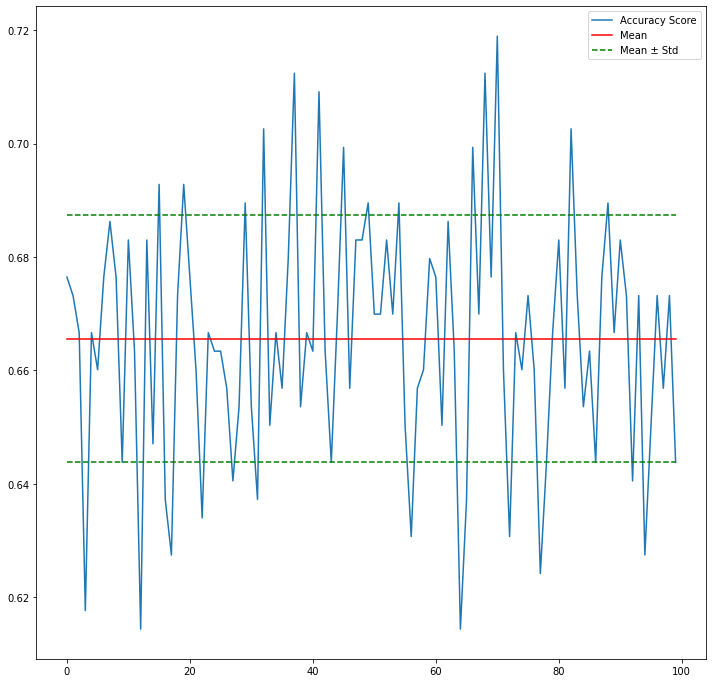

In [11]:
from statistics import mean, stdev
import matplotlib.pyplot as plt

accuracy_points = []
for i in range(100):
    train, test = train_test_split(data, test_size=0.3, random_state=i)
    X_train, y_train = train.loc[:,"A":"C"], train["D"]
    X_test, y_test = test.loc[:,"A":"C"], test["D"]
    
    tree.fit(X_train, y_train)
    prediction = tree.predict(X_test)
    accuracy_points.append(accuracy_score(y_test, prediction))

avg = mean(accuracy_points)
dvp = stdev(accuracy_points)

plt.figure(figsize=(12,12))
plt.plot(range(100), accuracy_points, label="Accuracy Score")
plt.plot(range(100), [avg] * 100, color='red', label="Mean")
plt.plot(range(100), [avg + dvp] * 100, color='green', linestyle='dashed',label="Mean ± Std")
plt.plot(range(100), [avg - dvp] * 100, color='green', linestyle='dashed')
plt.legend()

print(f"Average: {round(avg,3)}")
print(f"Standard Deviation: {round(dvp,3)}")